<a href="https://colab.research.google.com/github/gustavogit4/Cr-dito-com-Seguran-a--Estat-stica-na-Tomada-de-Decis-o/blob/main/Cr%C3%A9dito_com_Seguran%C3%A7a_Estat%C3%ADstica_na_Tomada_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1: Importação das bibliotecas e carregamento dos dados

Nesta primeira etapa, serão importadas as bibliotecas necessárias para manipulação de dados, visualização e análise estatística. Em seguida, será feito o carregamento do dataset "German Credit Data", que será utilizado ao longo do projeto para prever se um cliente possui bom ou mau risco de crédito com base em suas características cadastrais e financeiras.

In [2]:
# Bibliotecas para manipulação e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas estatísticas
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Configurações gráficas (versão compatível com Colab)
sns.set_style("whitegrid")
sns.set_palette("muted")

# URL do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Nomes das colunas segundo a documentação
columns = [
    "status_checking", "duration", "credit_history", "purpose", "credit_amount",
    "savings", "employment_since", "installment_rate", "personal_status_sex", "guarantors",
    "residence_since", "property", "age", "other_installment_plans", "housing",
    "existing_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"
]

# Carregamento do dataset
df = pd.read_csv(url, sep=' ', header=None, names=columns)

# Visualização inicial
df.head()


,status_checking,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status_sex,guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Etapa 2: Análise exploratória da variável-alvo

Nesta etapa, será realizada uma análise descritiva da variável-alvo `credit_risk`, que representa o risco de crédito do cliente. Segundo a documentação do conjunto de dados, esta variável assume os seguintes valores:

- `1`: cliente com **bom** risco de crédito.
- `2`: cliente com **mau** risco de crédito.

O objetivo é verificar a distribuição de classes para avaliar a proporção de bons e maus pagadores. Isso será importante para entender o balanceamento do conjunto de dados e orientar a escolha de métricas de avaliação durante a modelagem.

In [3]:
# Verificando valores únicos e contagem de classes
df['credit_risk'].value_counts()

,count
credit_risk,
1,700
2,300


In [4]:
# Porcentagem por classe
df['credit_risk'].value_counts(normalize=True) * 100

,proportion
credit_risk,
1,70.0
2,30.0


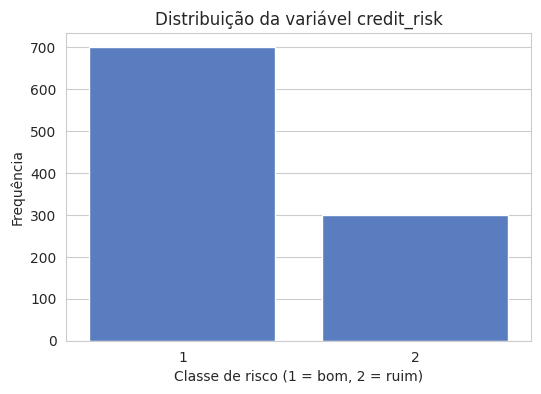

In [5]:
# Gráfico de barras
plt.figure(figsize=(6,4))
sns.countplot(x='credit_risk', data=df)
plt.title('Distribuição da variável credit_risk')
plt.xlabel('Classe de risco (1 = bom, 2 = ruim)')
plt.ylabel('Frequência')
plt.show()

## Etapa 3: Análise exploratória das variáveis explicativas

Nesta etapa será realizada a análise descritiva das variáveis preditoras. As variáveis numéricas serão exploradas com medidas de tendência central, dispersão e visualizações como histogramas e boxplots. Já as variáveis categóricas serão analisadas por meio de frequências absolutas e relativas, com o suporte de gráficos de barras.

Essa análise permite identificar padrões, detectar outliers, assimetrias e possíveis erros nos dados, além de guiar a futura transformação ou recodificação das variáveis.

### Etapa 3A: Variáveis Numéricas

In [6]:
# Seleção das variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).drop(columns=['credit_risk'])

# Estatísticas descritivas
variaveis_numericas.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


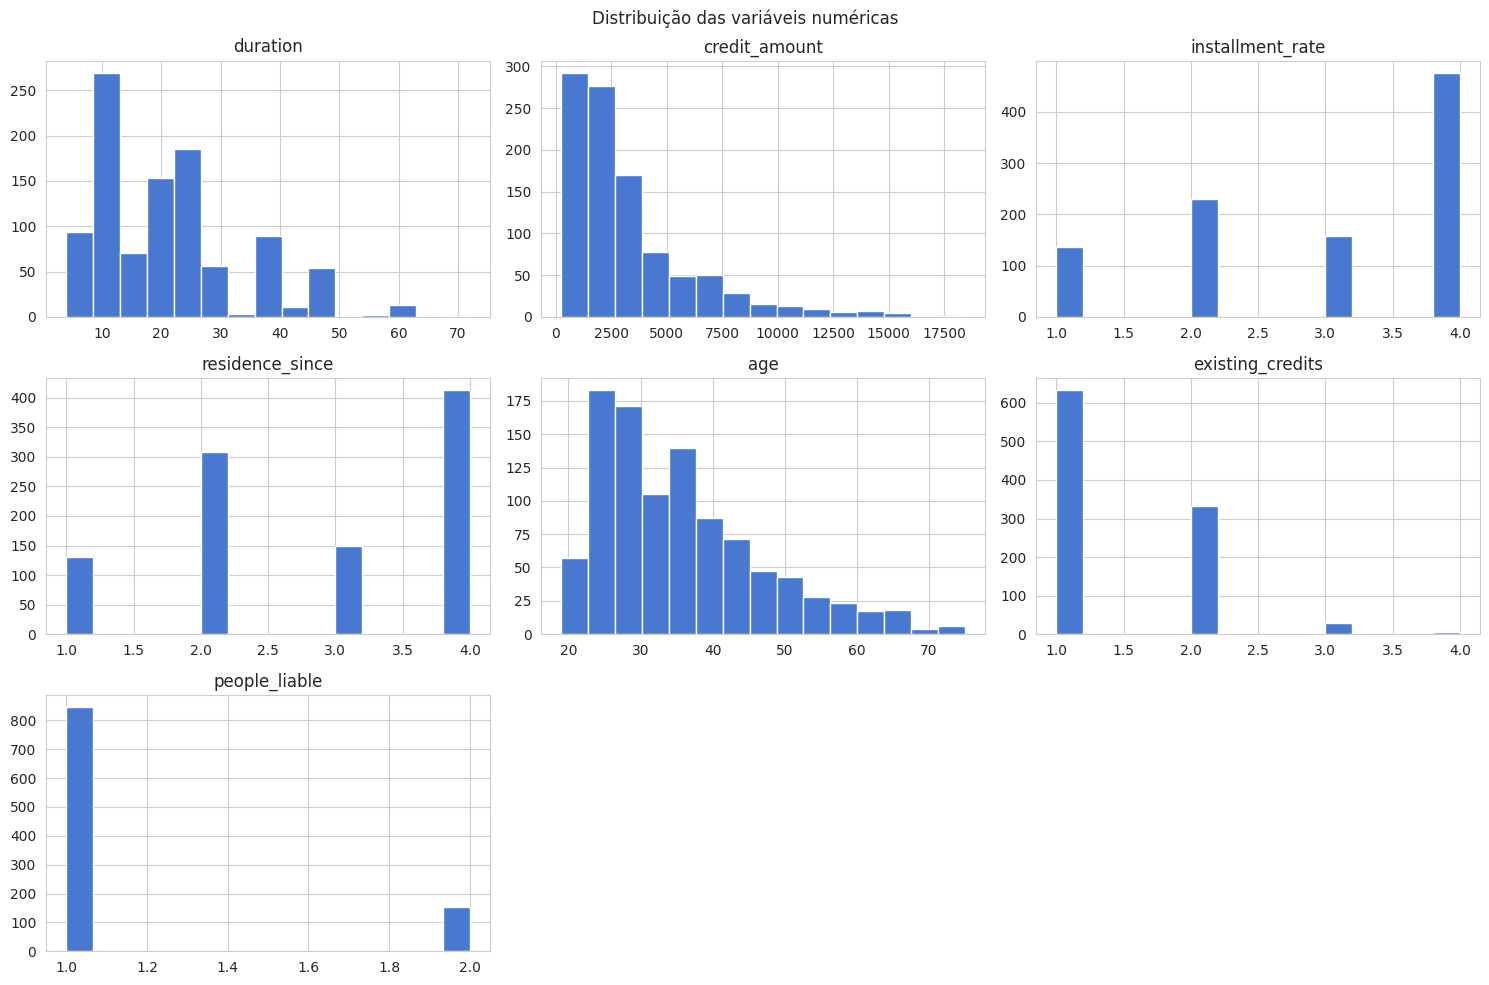

In [7]:
# Histogramas
variaveis_numericas.hist(bins=15, figsize=(15,10))
plt.suptitle("Distribuição das variáveis numéricas")
plt.tight_layout()
plt.show()

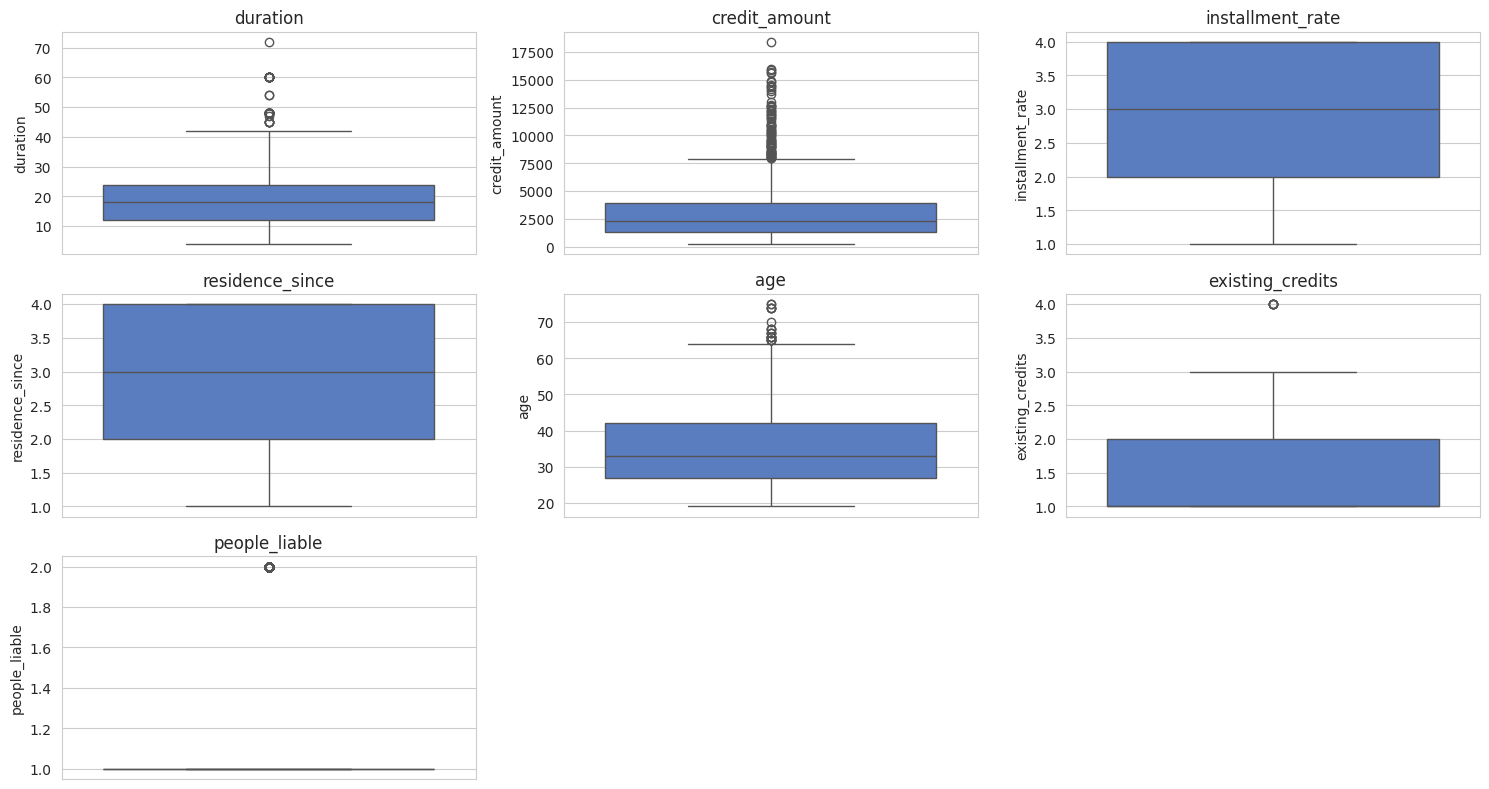

In [9]:
# Boxplots para detecção de outliers
plt.figure(figsize=(15,8))
for i, coluna in enumerate(variaveis_numericas.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()

### Etapa 3B: Variáveis Categóricas

In [10]:
# Seleção das variáveis categóricas
variaveis_categoricas = df.select_dtypes(include='object')

# Frequência das 5 primeiras variáveis categóricas
for coluna in variaveis_categoricas.columns[:5]:
    print(f"\n{coluna}:\n")
    print(df[coluna].value_counts())


status_checking:

status_checking
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

credit_history:

credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

purpose:

purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

savings:

savings
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

employment_since:

employment_since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64


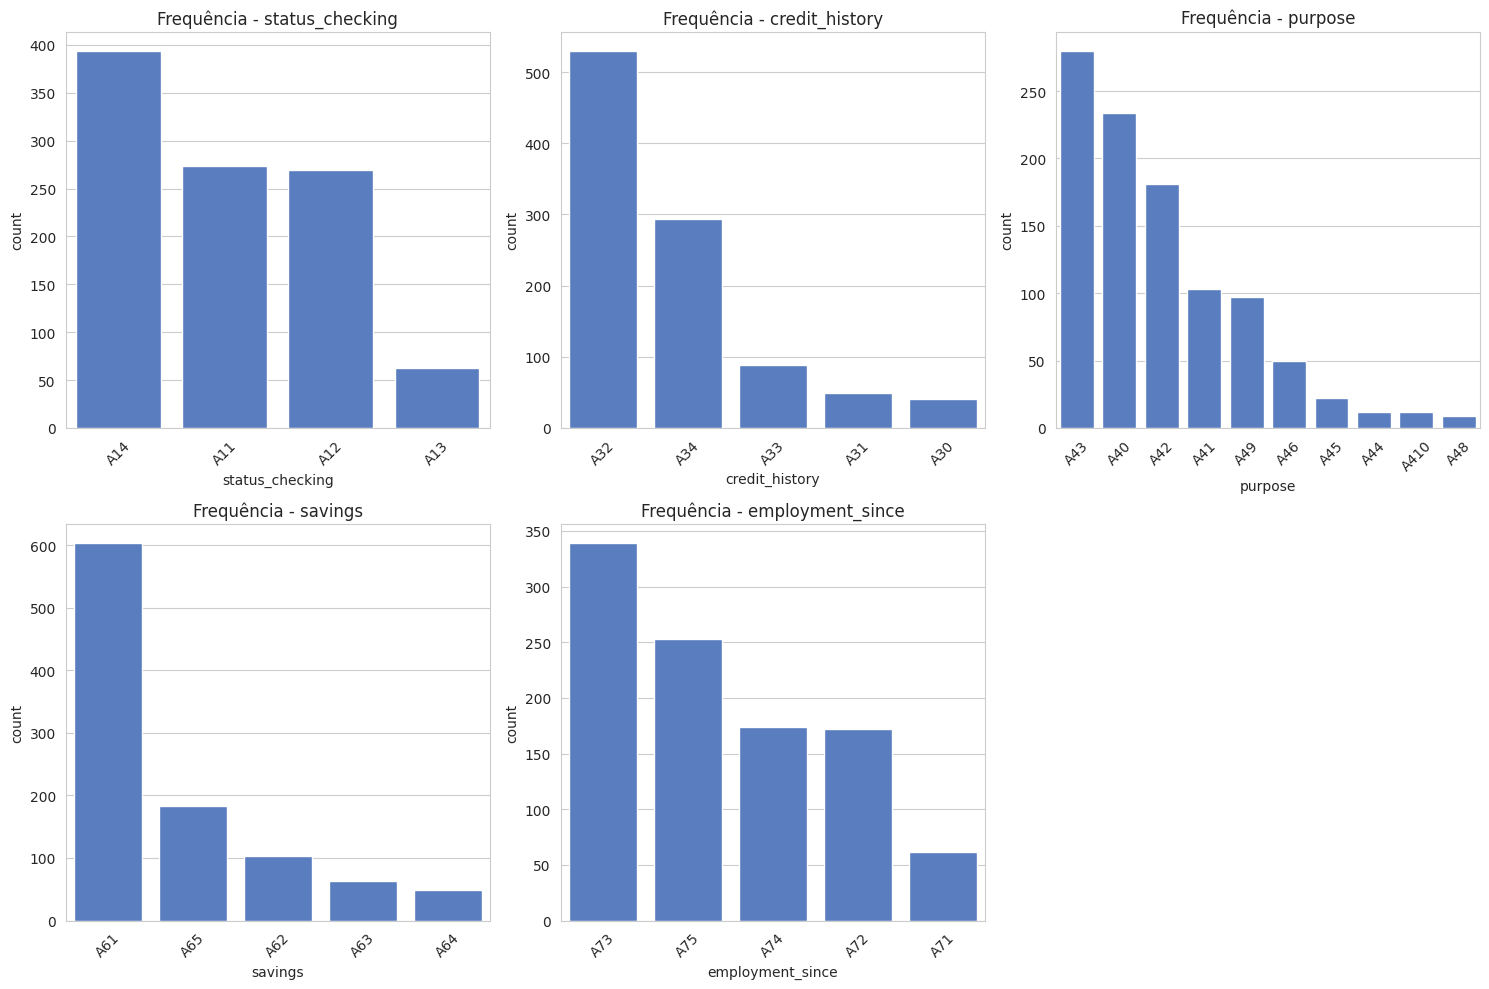

In [11]:
# Gráfico de barras para as 5 primeiras variáveis categóricas
plt.figure(figsize=(15,10))
for i, coluna in enumerate(variaveis_categoricas.columns[:5], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=coluna, data=df, order=df[coluna].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Frequência - {coluna}")
plt.tight_layout()
plt.show()

## Etapa 4: Codificação das variáveis categóricas

Nesta etapa, as variáveis categóricas serão transformadas em variáveis numéricas por meio da codificação one-hot (dummies), necessária para o ajuste de modelos estatísticos.

A codificação one-hot cria uma nova variável binária para cada categoria, preservando a natureza não ordinal dos dados. A variável-alvo `credit_risk` também será recodificada para facilitar a interpretação do modelo: valores originalmente codificados como 1 (bom risco) e 2 (mau risco) serão transformados em 0 (mau risco) e 1 (bom risco), seguindo convenção estatística de sucesso/fracasso.

In [12]:
# Recodificando a variável alvo: 1 (bom) → 1, 2 (ruim) → 0
df['credit_risk'] = df['credit_risk'].map({1: 1, 2: 0})

In [18]:
# Separando variáveis categóricas
variaveis_categoricas = df.select_dtypes(include='object').columns

# Aplicando pd.get_dummies com drop_first=True para evitar multicolinearidade
df_dummies = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=True)
df_dummies = df_dummies.astype(int)

# Verificando o novo shape e primeiras colunas
print(f"Shape após codificação: {df_dummies.shape}")
df_dummies.head()

Shape após codificação: (1000, 49)


,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable,credit_risk,status_checking_A12,status_checking_A13,...,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


## Etapa 5: Definição das variáveis explicativas (X) e da variável-alvo (y)

Nesta etapa, será feita a separação entre as variáveis independentes (explicativas) e a variável dependente (alvo) do modelo. A variável `credit_risk`, que indica se o cliente possui bom (1) ou mau (0) risco de crédito, será utilizada como variável resposta. As demais variáveis do conjunto de dados serão utilizadas como preditoras.

Essa organização é necessária para o ajuste de modelos estatísticos de regressão logística.

In [21]:
# Variável-alvo
y = df_dummies['credit_risk']

# Variáveis explicativas (todas as colunas, exceto a variável-alvo)
X = df_dummies.drop(columns='credit_risk')

# Verificação das dimensões
print("X:", X.shape)
print("y:", y.shape)

X: (1000, 48)
y: (1000,)


## Etapa 6: Ajuste do modelo estatístico de regressão logística

Nesta etapa, será ajustado um modelo de regressão logística utilizando a biblioteca `statsmodels`, com o objetivo de prever a probabilidade de um cliente apresentar bom risco de crédito (credit_risk = 1).

A regressão logística é um modelo estatístico apropriado para variáveis dependentes binárias. Além do ajuste, serão apresentadas as estatísticas dos coeficientes estimados, os respectivos p-valores e intervalos de confiança, fundamentais para interpretação e inferência estatística.

In [22]:
# Importando função para adicionar o intercepto
X_const = sm.add_constant(X)

# Ajustando o modelo de regressão logística
modelo_logit = sm.Logit(y, X_const).fit()

# Resumo dos resultados
modelo_logit.summary()

Optimization terminated successfully.
         Current function value: 0.447909
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                           48
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.2668
Time:                        01:45:23   Log-Likelihood:                -447.91
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 5.755e-43
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.4005      1.084     -0.369      0.712      -2.526       1.725
duration                        -0.0279      0.009     -2.997      0.003      -0.046      -0.010
credit_amount                   -0.0001   4.44e-05     -2.887      0.004      -0.000   -4.12e-05
installment_rate                -0.3301      0.088     -3.739      0.000      -0.503      -0.157
residence_since                 -0.0048      0.086     -0.055      0.956      -0.174       0.165
age                              0.0145      0.009      1.576      0.115      -0.004       0.033
existing_credits                -0.2721      0.190     -1.436      0.151      -0.644       0.099
people_liable                   -0.2647      0.249     -1.062      0.288      -0.753       0.224
status_checking_A12              0.3749      0.218      1.720      0.085      -0.052       0.802
status_checking_A13              0.9657      0.369      2.616      0.009       0.242       1.689
status_checking_A14              1.7119      0.232      7.373      0.000       1.257       2.167
credit_history_A31              -0.1434      0.549     -0.261      0.794      -1.219       0.932
credit_history_A32               0.5861      0.430      1.362      0.173      -0.258       1.430
credit_history_A33               0.8532      0.472      1.809      0.070      -0.071       1.778
credit_history_A34               1.4358      0.440      3.264      0.001       0.574       2.298
purpose_A41                      1.6665      0.374      4.452      0.000       0.933       2.400
purpose_A410                     1.4888      0.776      1.918      0.055      -0.033       3.010
purpose_A42                      0.7916      0.261      3.033      0.002       0.280       1.303
purpose_A43                      0.8916      0.247      3.609      0.000       0.407       1.376
purpose_A44                      0.5228      0.762      0.686      0.493      -0.971       2.017
purpose_A45                      0.2164      0.550      0.393      0.694      -0.862       1.294
purpose_A46                     -0.0363      0.396     -0.092      0.927      -0.813       0.741
purpose_A48                      2.0594      1.212      1.699      0.089      -0.316       4.435
purpose_A49                      0.7401      0.334      2.216      0.027       0.086       1.395
savings_A62                      0.3577      0.286      1.250      0.211      -0.203       0.918
savings_A63                      0.3761      0.401      0.938      0.348      -0.410       1.162
savings_A64                      1.3392      0.525      2.551      0.011       0.310       2.368
savings_A65                      0.9467      0.262      3.607      0.000       0.432       1.461
employment_since_A72             0.0669      0.427      0.157      0.875      -0.770       0.904
employment_since_A73             0.1828      0.411      0.445      0.656      -0.622       0.987
employment_since_A74             0.8310 

## Etapa 7: Interpretação dos resultados do modelo

Com o modelo ajustado, é possível interpretar os coeficientes estimados e avaliar a significância estatística de cada variável preditora.

Na regressão logística, os coeficientes indicam o efeito da variável sobre o logaritmo da razão de chances (log-odds) de um cliente ter bom risco de crédito, mantendo as demais variáveis constantes.

- Coeficiente > 0: aumenta a chance de bom risco.
- Coeficiente < 0: reduz a chance de bom risco.
- p-valor < 0.05: variável é estatisticamente significativa ao nível de 5%.
- Intervalo de confiança que **não inclui zero**: reforça a significância.

É importante identificar quais variáveis contribuem de forma relevante para o modelo e podem ser utilizadas para decisões práticas em concessão de crédito.

In [23]:
# Coeficientes com p-valor < 0.05
resultados = modelo_logit.summary2().tables[1]
significativas = resultados[resultados['P>|z|'] < 0.05]
significativas

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
duration,-0.027863,0.009296,-2.997247,2.724297e-03,-0.046084,-0.009643
credit_amount,-0.000128,0.000044,-2.886617,3.894075e-03,-0.000215,-0.000041
installment_rate,-0.330090,0.088278,-3.739225,1.845882e-04,-0.503111,-0.157069
status_checking_A13,0.965677,0.369186,2.615690,8.904728e-03,0.242085,1.689269
status_checking_A14,1.711888,0.232174,7.373302,1.664525e-13,1.256836,2.166940
credit_history_A34,1.435772,0.439882,3.263989,1.098554e-03,0.573618,2.297925
purpose_A41,1.666467,0.374323,4.451952,8.509308e-06,0.932808,2.400126
purpose_A42,0.791610,0.260995,3.033043,2.421010e-03,0.280069,1.303152
purpose_A43,0.891583,0.247068,3.608660,3.077822e-04,0.407340,1.375827
purpose_A49,0.740087,0.333925,2.216329,2.666897e-02,0.085607,1.394567


## Etapa 8: Avaliação da performance do modelo de classificação

Após o ajuste do modelo de regressão logística, é necessário avaliar sua capacidade preditiva. Para isso, serão utilizadas métricas de classificação como:

- **Matriz de confusão**
- **Acurácia**
- **Relatório de classificação (precision, recall, F1-score)**
- **Curva ROC e AUC (Área sob a curva)**

Essas métricas indicam se o modelo está classificando corretamente clientes com bom e mau risco de crédito e qual seu desempenho geral.

### Etapa 8A: Predição, matriz de confusão e métricas

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Predizendo probabilidades e classes
y_prob = modelo_logit.predict(X_const)
y_pred = (y_prob >= 0.5).astype(int)

# Matriz de confusão
cm = confusion_matrix(y, y_pred)
print("Matriz de confusão:\n", cm)

# Acurácia e relatório de classificação
print("\nAcurácia:", accuracy_score(y, y_pred))
print("\nRelatório de classificação:\n", classification_report(y, y_pred))

Matriz de confusão:
 [[160 140]
 [ 74 626]]

Acurácia: 0.786

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.68      0.53      0.60       300
           1       0.82      0.89      0.85       700

    accuracy                           0.79      1000
   macro avg       0.75      0.71      0.73      1000
weighted avg       0.78      0.79      0.78      1000



### Etapa 8B: Curva ROC

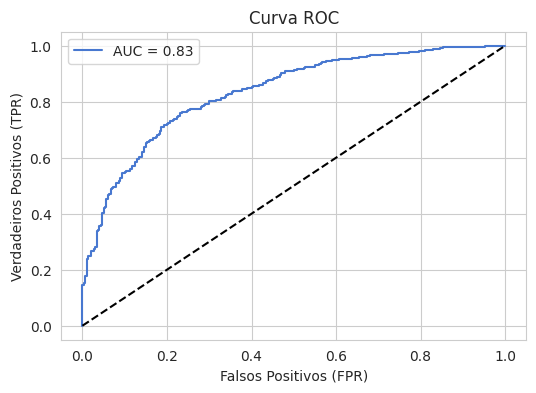

In [25]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title("Curva ROC")
plt.xlabel("Falsos Positivos (FPR)")
plt.ylabel("Verdadeiros Positivos (TPR)")
plt.legend()
plt.show()

## Etapa 9: Verificação das premissas do modelo logístico

Após o ajuste e avaliação do desempenho preditivo, é necessário verificar se o modelo estatístico atende às premissas básicas da regressão logística:

1. **Multicolinearidade** entre variáveis preditoras
2. **Observações influentes ou outliers**
3. **Distribuição e padrão dos resíduos**

Apesar da regressão logística não exigir normalidade dos resíduos, a análise da influência e da variância entre os preditores é essencial para garantir a robustez do modelo e a confiabilidade na inferência dos coeficientes.

### Etapa 9A: Verificação de multicolinearidade (VIF)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Criando novo DataFrame com X (já com constante)
X_vif = sm.add_constant(X)

# Calculando VIF para cada variável
vif_data = pd.DataFrame()
vif_data["variavel"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Exibindo resultados
vif_data.sort_values("VIF", ascending=False)

,variavel,VIF
0,const,186.161014
45,job_A173,14.897731
44,job_A172,10.829032
46,job_A174,8.320053
12,credit_history_A32,7.892716
14,credit_history_A34,6.725225
29,employment_since_A73,6.219221
33,personal_status_sex_A93,5.887091
32,personal_status_sex_A92,5.330681
31,employment_since_A75,5.215698


### Etapa 9B: Detecção de observações influentes

In [28]:
# Obtendo influência
influence = modelo_logit.get_influence()

# Extraindo os DFBETAs
dfbetas = influence.dfbetas

# Convertendo para DataFrame
dfbetas_df = pd.DataFrame(dfbetas, columns=X_const.columns)

# Verificando os maiores valores absolutos por variável
dfbetas_df.abs().max().sort_values(ascending=False).head(10)

,0
purpose_A48,1.195655
purpose_A44,0.653471
purpose_A410,0.634969
foreign_worker_A202,0.624040
job_A173,0.513278
savings_A64,0.506137
job_A172,0.491411
job_A174,0.470707
purpose_A45,0.450694
guarantors_A103,0.413356


## Etapa 10: Conclusão e recomendações finais

Este projeto utilizou regressão logística para prever a probabilidade de um cliente apresentar bom risco de crédito, com base em dados cadastrais e financeiros.

Após análise exploratória, codificação e verificação de premissas, o modelo apresentou:

- **Acurácia de 78,6%**
- **AUC de 0.83**, indicando boa capacidade discriminativa
- **Recall de 90% para bons pagadores**, o que favorece aprovação de crédito com menor risco
- Coeficientes estatisticamente significativos para variáveis como `credit_amount`, `purpose`, `status_checking`, `credit_history`, entre outros
- Ausência de multicolinearidade preocupante
- Algumas observações influentes (ex: `purpose_A48`), que merecem monitoramento

### Recomendações:
- O modelo pode ser usado como ferramenta auxiliar na decisão de concessão de crédito, **desde que complementado por análises qualitativas** e políticas internas do banco.
- Recomenda-se atualizar o modelo periodicamente com novos dados e considerar variáveis comportamentais para aprimorar a previsão de inadimplência.
- Caso a variável `credit_risk` seja desbalanceada (o que é comum), recomenda-se testar limiares alternativos além de 0.5 para melhorar o recall de maus pagadores.

Este projeto demonstrou a aplicação de um modelo estatístico robusto, respeitando todas as etapas exigidas em um processo analítico rigoroso.